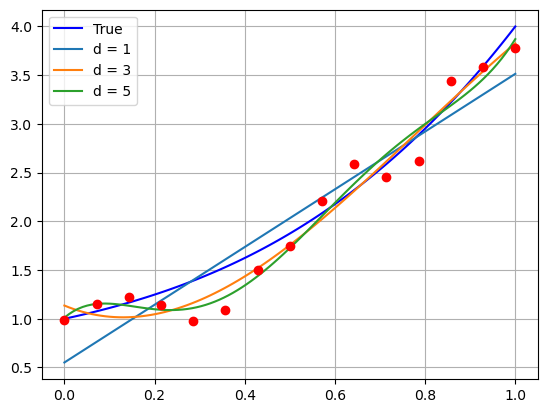

In [1]:
### Ri-definiamo i dati come fatto precedentemente 
# (imposto sigma = 0.2 invece che 0.1 per far risaltare meglio)
import numpy as np
import matplotlib.pyplot as plt

# Definiamo la funzione f(x, alpha) che prende in input il vettore alpha dei coefficienti e un valore x, e ritorna il valore del rispettivo polinomio
def f(x, alpha):
    d = alpha.shape[0] - 1 # abbiamo detto che la shape di alpha è (d+1, )

    y = np.zeros_like(x) # Questa è l'unica riga che dobbiamo cambiare rispetto a prima!
    for i in range(d+1):
        y = y + alpha[i] * x ** i
    return y

d_true = 3 # grado vero del polinomio
alpha_true = np.ones((d_true+1,))

# Numero di dati
n = 15

# Definiamo la deviazione standard del rumore
sigma = 0.2

# Generiamo il rumore
e = np.random.normal(loc=0, scale=sigma, size=(n, ))

# Definiamo gli x_i
x = np.linspace(0, 1, n)
y = f(x, alpha_true) + e

# Definiamo la matrice di Vandermonde
def vandermonde(x, d):
    r"""
    Preso in input un numpy array "x" di lunghezza (n, ) contentente i dati, e un valore intero "d" rappresentante il grado del polinomio, 
    costruisce e ritorna la matrice di vandermonde X di grado d, associata a x.

    Parameters:
    x (ndarray): Il vettore dei dati di input.
    d (int): Il grado massimo del polinomio.

    Returns:
    X (ndarray): La matrice di Vandermonde di grado "d", associata ad x.
    """
    n = x.shape[0]
    
    # Inizializzo la matrice di Vandermonde con shape (n, d+1)
    X = np.zeros((n, d+1))
    
    # Costruisco la matrice di Vandermonde
    for i in range(d+1):
        X[:, i] = x ** i
    return X

## Calcoliamo la soluzione con d variabile tra 0 e 4 e salviamole in una lista
alpha_chol = []
for d in range(6):
    # Matrice di Vandermonde di grado d
    X = vandermonde(x, d)

    # Troviamo la matrice L tale che X^T X = L L^T
    L = np.linalg.cholesky(X.T @ X)

    ###### Risolviamo il primo sistema:
    # Calcoliamo il termine noto X^T y
    Xty = X.T @ y

    # Troviamo z
    z = np.linalg.solve(L, Xty)

    ###### Risolviamo il secondo sistema:
    # Troviamo alpha
    alpha_temp = np.linalg.solve(L.T, z)
    alpha_chol.append(alpha_temp)

# Visualizziamo il plot
xx = np.linspace(0, 1, 100)
yy_true = f(xx, alpha_true)
legend = ["True"]

plt.plot(xx, yy_true, 'b')
for d in range(1, 6, 2):
    yy_chol = f(xx, alpha_chol[d])
    plt.plot(xx, yy_chol)
    legend.append(f"d = {d}")
plt.plot(x, y, 'ro')
plt.legend(legend)
plt.grid()
plt.show()

In [2]:
def residuo(X, y, alpha):
    r = np.linalg.norm(X @ alpha - y) ** 2
    return r

for d in range(6):
    # Matrice di Vandermonde di grado d
    X = vandermonde(x, d)

    print(f"Residuo per d = {d}: {residuo(X, y, alpha_chol[d])}.")

Residuo per d = 0: 13.987117183889055.
Residuo per d = 1: 1.449588236344063.
Residuo per d = 2: 0.54792373645464.
Residuo per d = 3: 0.45916183121439985.
Residuo per d = 4: 0.44853276437057976.
Residuo per d = 5: 0.373358633773025.


In [3]:
# Definiamo il valore per il parametro "lambda"
lmbda = 1 # NOTA: il nome "lambda" è riservato nel linguaggio di Python.
             #       usare una storpiatura del nome come "lmbda"

# Definiamo la matrice A := (X^T X + lambda * I)
A = X.T @ X + lmbda * np.eye(d+1)

# Calcoliamo la sua decomposizione di Cholesky
L = np.linalg.cholesky(A)

# Risolviamo i due sistemi triangolari
z = np.linalg.solve(L, X.T @ y)
alpha_chol = np.linalg.solve(L.T, z)

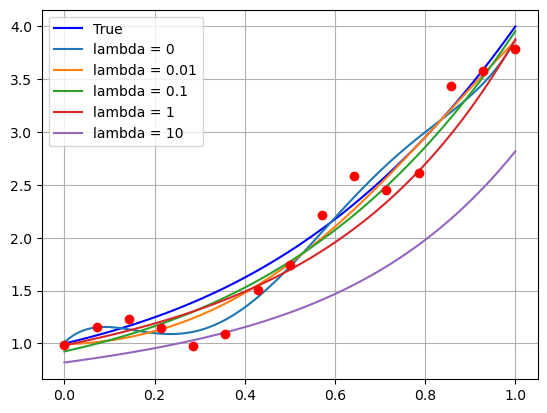

[   1.01092069    3.9758764   -35.13588316  109.95934467 -123.53817674
   47.59819423]
[ 0.99222319  0.13495817  2.15744449  1.46772564  0.13699509 -1.02666257]
[ 0.9247625   0.94995297  1.06313769  0.72260506  0.31979125 -0.02422216]
[0.98355801 0.86089313 0.70618524 0.55541496 0.43288888 0.33877013]
[0.82035896 0.56865816 0.45029324 0.37451873 0.32175477 0.28326106]


In [4]:
## Calcoliamo le soluzioni con lambda variabile e salviamole in una lista
lmbda_list = [0, 1e-2, 1e-1, 1, 10]

# Matrice di Vandermonde di grado d
d = 5
X = vandermonde(x, d)

alpha_chol = []
for lmbda in lmbda_list:
    # Troviamo la matrice L tale che X^T X = L L^T
    L = np.linalg.cholesky(X.T @ X + lmbda * np.eye(d+1))

    ###### Risolviamo il primo sistema:
    # Calcoliamo il termine noto X^T y
    Xty = X.T @ y

    # Troviamo z
    z = np.linalg.solve(L, Xty)

    ###### Risolviamo il secondo sistema:
    # Troviamo alpha
    alpha_chol.append(np.linalg.solve(L.T, z))

# Visualizziamo il plot
xx = np.linspace(0, 1, 100)
yy_true = f(xx, alpha_true)
legend = ["True"]

plt.plot(xx, yy_true, 'b')
for i, lmbda in enumerate(lmbda_list):
    yy_chol = f(xx, alpha_chol[i])
    plt.plot(xx, yy_chol)
    legend.append(f"lambda = {lmbda}")
plt.plot(x, y, 'ro')
plt.legend(legend)
plt.grid()
plt.show()

for alpha in alpha_chol:
    print(alpha)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB
None
Shape of x: (188,), Shape of y: (188,).


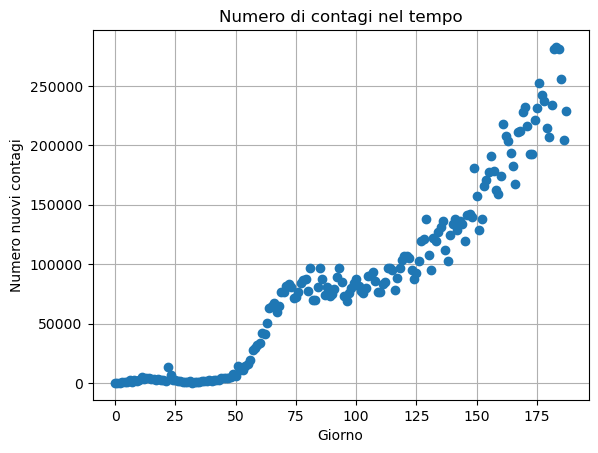

In [5]:
import pandas as pd

# Set data path
data_path = "./data/day_wise.csv"

# Load data
data = pd.read_csv(data_path)
print(data.info())

# Estriamo data (x) e nuovi casi (y)
x = pd.to_datetime(data['Date'])
y = data["New cases"]

# Convertiamo la data (x) in un intero incrementale
x = (x - x.min()).dt.days

import numpy as np

# Convertiamo x e y in numpy array
x = np.array(x)
y = np.array(y)
print(f"Shape of x: {x.shape}, Shape of y: {y.shape}.")

import matplotlib.pyplot as plt

# Visualizzazione
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel("Giorno")
plt.ylabel("Numero nuovi contagi")
plt.title("Numero di contagi nel tempo")
plt.show()

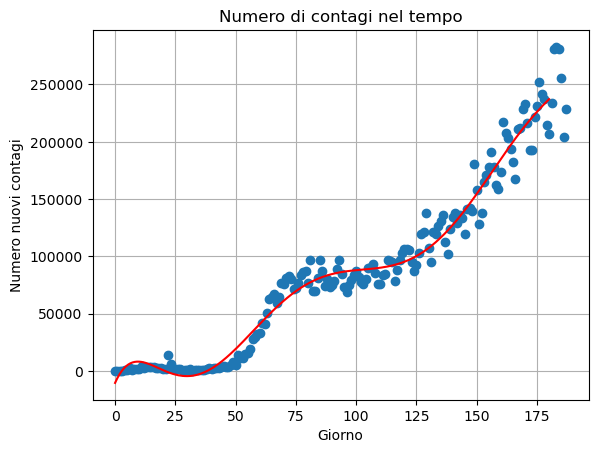

In [6]:
# Abbiamo due vettori: x e y che rappresentano i dati.
# Definiamo la matrice di Vandermonde
def vandermonde(x, d):
    r"""
    Preso in input un numpy array "x" di lunghezza (n, ) contentente i dati, e un valore intero "d" rappresentante il grado del polinomio, 
    costruisce e ritorna la matrice di vandermonde X di grado d, associata a x.

    Parameters:
    x (ndarray): Il vettore dei dati di input.
    d (int): Il grado massimo del polinomio.

    Returns:
    X (ndarray): La matrice di Vandermonde di grado "d", associata ad x.
    """
    n = x.shape[0]
    
    # Inizializzo la matrice di Vandermonde con shape (n, d+1)
    X = np.zeros((n, d+1))
    
    # Costruisco la matrice di Vandermonde
    for i in range(d+1):
        X[:, i] = x ** i
    return X

# Scelto un grado d del polinomio, calcolare con
# il metodo di Cholesky la soluzione alpha_chol
# dei parametri che interpolano i dati.

# Poi rappresentare su grafico e determinare eventuale
# overfit/underfit (a occhio)
d = 7
X = vandermonde(x, d)

# Cholesky
L = np.linalg.cholesky(X.T @ X)

# Primo sistema
z = np.linalg.solve(L, X.T@y)

# Secondo sistema
alpha_chol = np.linalg.solve(L.T, z)

# Plottiamo
xx = np.linspace(0, 180, 200)
yy_chol = f(xx, alpha_chol)

# Visualizzazione
plt.plot(x, y, 'o')
plt.plot(xx, yy_chol, 'r-')
plt.grid()
plt.xlabel("Giorno")
plt.ylabel("Numero nuovi contagi")
plt.title("Numero di contagi nel tempo")
plt.show()

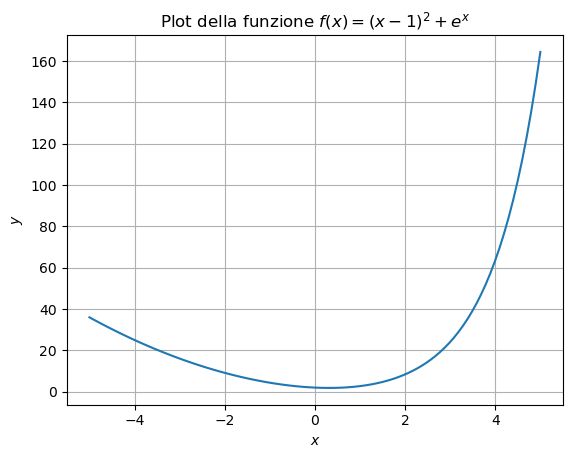

In [7]:
# Importiamo le librerie utili
import numpy as np
import matplotlib.pyplot as plt

# Definiamo la funzione f(x) = (x-1)^2 + e^x
def f(x):
    y = (x-1)**2 + np.exp(x)
    
    return y

# Definiamo un'intervallo di riferimento
a, b = -5, 5
N = 100 # Numero di punti

# Definiamo una discretizzazione dell'asse x
xx = np.linspace(a, b, N)

# Calcoliamo il rispettivo valore di y
yy = f(xx)

# Plot
plt.plot(xx, yy, '-')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = (x-1)^2 + e^x$')
plt.show()